<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/LinearRegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
# import the dataset and extract the independent and dependent variables
companies = pd.read_csv('https://raw.githubusercontent.com/sseyler0119/datasets/master/1000_Companies.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


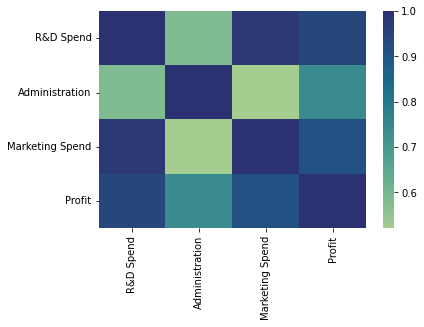

In [25]:
# data visualization
# Build the correlation matrix
sns.heatmap(companies.corr(), cmap="crest") # changed color map

In [26]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3]) # change categorical State values in column 3 to numerical values
onehotencoder = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder="passthrough")
X = onehotencoder.fit_transform(X)

In [27]:
# avoiding dummy variable trap
X = X[:, 1:] # remove the extra column created by the OneHotEncoder

In [28]:
# split the dataset into Training and Testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
# fitting multiplie linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532915,  88427.07187361,  94894.67836971, 175680.86725611,
        83411.73042088, 110571.90200074, 132145.2293644 ,  91473.37719686,
       164597.05380607,  53222.826674  ,  66950.19050989, 150566.43987005,
       126915.20858596,  59337.85971049, 177513.91053062,  75316.28143051,
       118248.14406603, 164574.40699902, 170937.2898107 , 182069.11645085,
       118845.03252689,  85669.95112228, 180992.59396144,  84145.08220144,
       105005.83769214, 101233.56772746,  53831.0766909 ,  56881.41475223,
        68896.39346904, 210040.00765884, 120778.72270894, 111724.87157654,
       101487.90541517, 137959.02649624,  63969.95996743, 108857.91214126,
       186014.72531988, 171442.64130748, 174644.26529205, 117671.49128195,
        96731.37857433, 165452.2577941 , 107724.34331255,  50194.54176912,
       116513.89532179,  58632.4898682 , 158416.4682761 ,  78541.48521609,
       159727.66671744, 131137.87699644, 184880.70924517, 174609.0826688 ,
        93745.66352059,  

In [32]:
# calculating the coefficients
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [33]:
# calculating the intercept
print(regressor.intercept_)

-51035.22972404538


In [34]:
# calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # r2 > .91, this model is a good fit

0.9112695892268894